In [155]:
# Python program to scrape heading tags
import pickle
from IPython import display
import math
from pprint import pprint
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
import os
import spacy
from textblob import TextBlob
from pattern.en import sentiment
import urllib3 
import re
import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

nlp = spacy.load('en_core_web_sm')
%matplotlib inline
sns.set(style='darkgrid', context='talk', palette='Dark2')

cleanData = []
tag_words = []
regex = re.compile('[^a-zA-Z]')

headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"} 
#find what headers you are sending here: https://www.whatismybrowser.com/detect/what-http-headers-is-my-browser-sending

url_link = 'https://oregonlive.com' #define URL to scrape
utc_datetime = datetime.datetime.utcnow()
date_string = utc_datetime.strftime("%Y-%m-%d-%H%M_UTC")
filename = f'{url_link[8:len(date_string)]}_{date_string}'


# scrape a chosen URL
request = requests.get(url_link, headers=headers)
Soup = BeautifulSoup(request.text, 'lxml') #create soup obejct

if request.status_code == 200: #error handling for URL request
    print('Request successful.')
elif request.status_code == 404:
    print('Error 404: Not Found.')
    

# creating a list by type of heading tags
heading_tags = ["h1","h2","h3"] #the user will have to determine what "h" tags are valid for given URL
for tags in Soup.find_all(heading_tags):
    tag_words.append(tags.text.strip())
#     lower_words = [strg.lower() for strg in tag_words] #some sentiment analyzers analyze case
    
for i in tag_words:  #slice based on data you want to include. Some junk data can be removed
    if len(i) > 16:    #Fliter a composite length of strings based on targeted threshold
        cleanData.append(regex.sub(' ', i))

deDup = list(set(cleanData))

with open(filename, "wb") as fp: #Pickling data as list with UTC time stamp
    pickle.dump(deDup, fp)

# with open(filename,'w') as a: # uncomment if you want to save a text copy to avoid utf-8 error message
#     a.write('\n'.join(cleanData))




Request successful.


<h3> The variable name "filename" is the stored value of the file. We can either work with that data or load previously scraped data at this point, i.e "foxnews_2023-01-07-2241_UTC". Be aware that pickled files will not display in Jupyter, to review the text you have to uncomment the above file writing code.<br><br> Once loaded, we slice and print the first five headlines to see if the content is as expected. </h3>

In [156]:
with open(filename, "rb") as fp: #Either load stored variable value for "filename" or saved pickled "example_1_0_23"
    saved_text = pickle.load(fp)

saved_text[0:5] #confirm your expected text is correct

['See the most expensive home for sale in each of Oregon s    counties',
 'More on OregonLive com',
 'Portland Public Schools slows efforts to end early algebra for select middle schoolers',
 'Oregon State mailbag  Pac         schedule  Game Day in Corvallis next season  transfer talk',
 'Liz Weston  Why don t most credit cards require a PIN when you use them ']

<h3> Once we have the right text, we can check the polarity of the scraped headlines. 
<br><br>
Sentence-level polarity detection is to decide whether a given sentence expresses either an overall positive or negative opinion. </h3>

In [157]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA 

sia = SIA() 
score_data = []

for line in saved_text:
    score = sia.polarity_scores(line)
    score['Headline'] = line
    score_data.append(score)

pprint(score_data, width=100) #pretty print sentiment scores

[{'Headline': 'See the most expensive home for sale in each of Oregon s    counties',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'Headline': 'More on OregonLive com', 'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'Headline': 'Portland Public Schools slows efforts to end early algebra for select middle '
              'schoolers',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'Headline': 'Oregon State mailbag  Pac         schedule  Game Day in Corvallis next season  '
              'transfer talk',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'Headline': 'Liz Weston  Why don t most credit cards require a PIN when you use them ',
  'compound': 0.4391,
  'neg': 0.0,
  'neu': 0.806,
  'pos': 0.194},
 {'Headline': 'Beignet bummer  NOLA Doughnuts closes all Portland area locations',
  'compound': -0.3818,
  'neg': 0.245,
  'neu': 0.755,
  'pos': 0.0},
 {'Headline': 'Make travel plans now for weekend closure of I    near I   

<h3>Now we can create Pandas data frame to visualize some of the headlines and scores.</h3>

In [158]:
df = pd.DataFrame.from_records(score_data)
df

,neg,neu,pos,compound,Headline
0,0.0,1.000,0.000,0.0000,See the most expensive home for sale in each o...
1,0.0,1.000,0.000,0.0000,More on OregonLive com
2,0.0,1.000,0.000,0.0000,Portland Public Schools slows efforts to end e...
3,0.0,1.000,0.000,0.0000,Oregon State mailbag Pac schedule Ga...
4,0.0,0.806,0.194,0.4391,Liz Weston Why don t most credit cards requir...
...,...,...,...,...,...
76,0.0,0.769,0.231,0.2023,All state boys soccer Oregon s top A ...
77,0.0,1.000,0.000,0.0000,Footer Navigation
78,0.0,0.649,0.351,0.7579,Recapping Oregon Ducks Holiday Bowl win coac...
79,0.0,1.000,0.000,0.0000,Oregon State Beavers tight end J T Byrne anno...


In [159]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df

,neg,neu,pos,compound,Headline,label
0,0.0,1.000,0.000,0.0000,See the most expensive home for sale in each o...,0
1,0.0,1.000,0.000,0.0000,More on OregonLive com,0
2,0.0,1.000,0.000,0.0000,Portland Public Schools slows efforts to end e...,0
3,0.0,1.000,0.000,0.0000,Oregon State mailbag Pac schedule Ga...,0
4,0.0,0.806,0.194,0.4391,Liz Weston Why don t most credit cards requir...,1
...,...,...,...,...,...,...
76,0.0,0.769,0.231,0.2023,All state boys soccer Oregon s top A ...,1
77,0.0,1.000,0.000,0.0000,Footer Navigation,0
78,0.0,0.649,0.351,0.7579,Recapping Oregon Ducks Holiday Bowl win coac...,1
79,0.0,1.000,0.000,0.0000,Oregon State Beavers tight end J T Byrne anno...,0


In [160]:
df2 = df[['Headline', 'label']]
df2.to_csv(filename +'.csv', mode='a', encoding='utf-8', index=False)

In [161]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].Headline)[:10], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].Headline)[:10], width=200)

Positive headlines:

['Liz Weston  Why don t most credit cards require a PIN when you use them ',
 'All state football       Oregon s top  A stars',
 'Rewinding Oregon men s basketball s       win at Utah',
 'Tacoma guaranteed income program shows how much it can help',
 'N Faly Dante  Will Richardson lead Oregon men s basketball to upset at Utah  keep postseason hopes alive for Ducks',
 'Stars matter  Georgia  TCU both excel in player development',
 'Preservationists say windows at former Portland Korean Church are worth saving  Are they Povey Brothers glass ',
 'Gary Payton II probable for Portland Trail Blazers at Toronto Raptors  Game preview  time  TV channel  how to watch free live stream online',
 'Patrick Mahomes sets record  Chiefs beat Raiders for AFC s top seed',
 'SAIF says data breach may have compromised Social Security numbers  medical information']

Negative headlines:

['Beignet bummer  NOLA Doughnuts closes all Portland area locations',
 'Arrest made in      Portland 

In [162]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100) #normalize data

 0    33
 1    25
-1    23
Name: label, dtype: int64
 0    40.740741
 1    30.864198
-1    28.395062
Name: label, dtype: float64


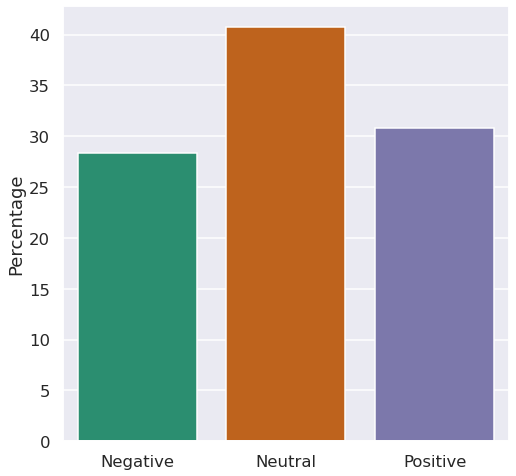

In [163]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [164]:
textblob_sentiment=[]
for s in saved_text:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [165]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [166]:
df_textblob

,Sentence,Polarity,Subjectivity
0,See the most expensive home for sale in each o...,0.000000,0.600000
1,More on OregonLive com,0.500000,0.500000
2,Portland Public Schools slows efforts to end e...,0.033333,0.122222
3,Oregon State mailbag Pac schedule Ga...,-0.200000,0.200000
4,Liz Weston Why don t most credit cards requir...,0.500000,0.500000
...,...,...,...
76,All state boys soccer Oregon s top A ...,0.500000,0.500000
77,Footer Navigation,0.000000,0.000000
78,Recapping Oregon Ducks Holiday Bowl win coac...,0.525000,0.366667
79,Oregon State Beavers tight end J T Byrne anno...,-0.178571,0.285714


In [167]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      81 non-null     object 
 1   Polarity      81 non-null     float64
 2   Subjectivity  81 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


Text(0.5, 15.439999999999998, 'Sentence Polarity (Textblob)')

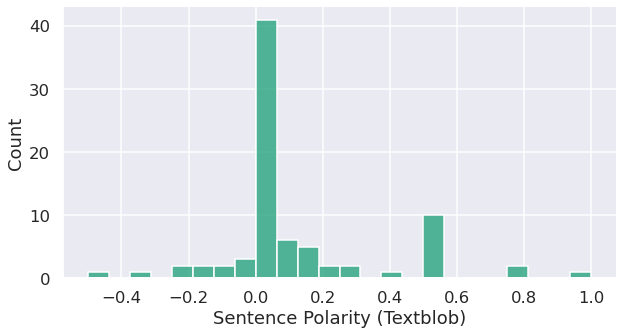

In [168]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 15.439999999999998, 'Sentence Subjectivity (Textblob)')

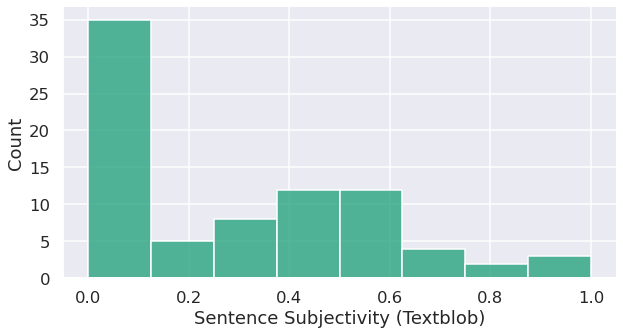

In [169]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [170]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [171]:
stop_tokens = []
stop_tokens_plot = []

def process_text(headlines):
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        stop_tokens.extend(toks)
        stop_tokens_plot.append(toks)
    
    return stop_tokens

process_text(saved_text)


['see',
 'expensive',
 'home',
 'sale',
 'oregon',
 'counties',
 'oregonlive',
 'com',
 'portland',
 'public',
 'schools',
 'slows',
 'efforts',
 'end',
 'early',
 'algebra',
 'select',
 'middle',
 'schoolers',
 'oregon',
 'state',
 'mailbag',
 'pac',
 'schedule',
 'game',
 'day',
 'corvallis',
 'next',
 'season',
 'transfer',
 'talk',
 'liz',
 'weston',
 'credit',
 'cards',
 'require',
 'pin',
 'use',
 'beignet',
 'bummer',
 'nola',
 'doughnuts',
 'closes',
 'portland',
 'area',
 'locations',
 'make',
 'travel',
 'plans',
 'weekend',
 'closure',
 'near',
 'beginning',
 'friday',
 'night',
 'state',
 'football',
 'oregon',
 'top',
 'stars',
 'rewinding',
 'oregon',
 'men',
 'basketball',
 'win',
 'utah',
 'arrest',
 'made',
 'portland',
 'house',
 'party',
 'shooting',
 'killed',
 'jemare',
 'manns',
 'workshops',
 'lectures',
 'add',
 'winter',
 'calendar',
 'tacoma',
 'guaranteed',
 'income',
 'program',
 'shows',
 'much',
 'help',
 'damar',
 'hamlin',
 'covid',
 'vaccines',
 'scient

In [172]:
flat_tokens = [item for sublist in stop_tokens_plot for item in sublist] 
flat_tokens

['see',
 'expensive',
 'home',
 'sale',
 'oregon',
 'counties',
 'oregonlive',
 'com',
 'portland',
 'public',
 'schools',
 'slows',
 'efforts',
 'end',
 'early',
 'algebra',
 'select',
 'middle',
 'schoolers',
 'oregon',
 'state',
 'mailbag',
 'pac',
 'schedule',
 'game',
 'day',
 'corvallis',
 'next',
 'season',
 'transfer',
 'talk',
 'liz',
 'weston',
 'credit',
 'cards',
 'require',
 'pin',
 'use',
 'beignet',
 'bummer',
 'nola',
 'doughnuts',
 'closes',
 'portland',
 'area',
 'locations',
 'make',
 'travel',
 'plans',
 'weekend',
 'closure',
 'near',
 'beginning',
 'friday',
 'night',
 'state',
 'football',
 'oregon',
 'top',
 'stars',
 'rewinding',
 'oregon',
 'men',
 'basketball',
 'win',
 'utah',
 'arrest',
 'made',
 'portland',
 'house',
 'party',
 'shooting',
 'killed',
 'jemare',
 'manns',
 'workshops',
 'lectures',
 'add',
 'winter',
 'calendar',
 'tacoma',
 'guaranteed',
 'income',
 'program',
 'shows',
 'much',
 'help',
 'damar',
 'hamlin',
 'covid',
 'vaccines',
 'scient

In [173]:
pos_lines = list(df[df.label == 1].Headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('oregon', 31),
 ('portland', 19),
 ('state', 18),
 ('top', 10),
 ('basketball', 9),
 ('ducks', 9),
 ('stars', 8),
 ('men', 7),
 ('win', 6),
 ('utah', 6),
 ('dear', 6),
 ('online', 6),
 ('doctor', 6),
 ('year', 6),
 ('shooting', 5),
 ('say', 5),
 ('arizona', 5),
 ('coach', 5),
 ('police', 5),
 ('game', 4)]

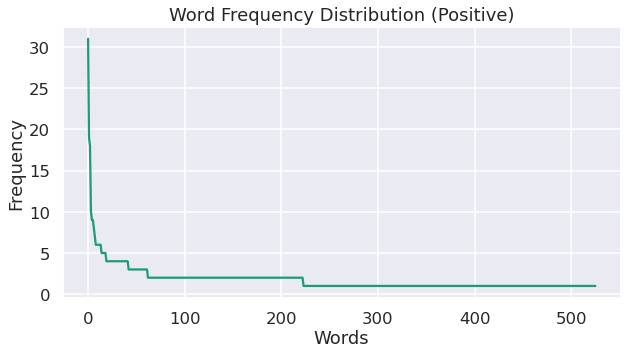

In [174]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

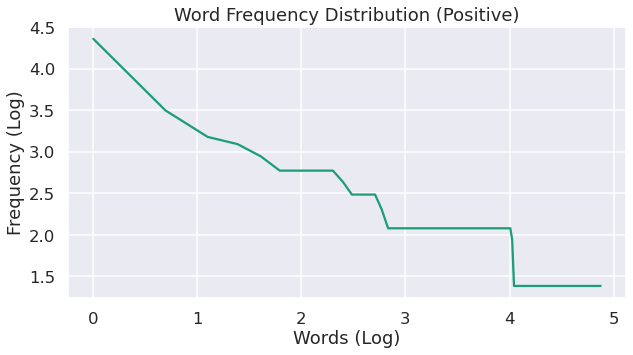

In [175]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [176]:
neg_lines = list(df2[df2.label == -1].Headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('oregon', 34),
 ('portland', 27),
 ('state', 21),
 ('top', 10),
 ('basketball', 10),
 ('shooting', 10),
 ('year', 10),
 ('ducks', 9),
 ('stars', 8),
 ('men', 8),
 ('dear', 8),
 ('police', 8),
 ('doctor', 8),
 ('old', 8),
 ('say', 7),
 ('online', 7),
 ('win', 6),
 ('utah', 6),
 ('arizona', 6),
 ('murder', 6)]

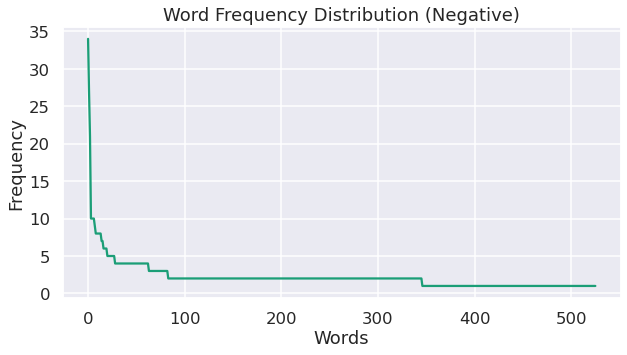

In [177]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

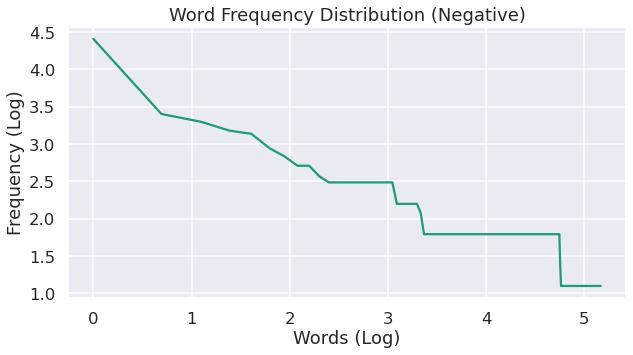

In [178]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

In [179]:
from nltk.stem import WordNetLemmatizer
ls = WordNetLemmatizer()
stem_tokens = []
for t in stop_tokens:
    if len(t) > 1:
        lemma = ls.lemmatize(t) 
        stem_tokens.append(lemma)

In [180]:
stem_tokens

['see',
 'expensive',
 'home',
 'sale',
 'oregon',
 'county',
 'oregonlive',
 'com',
 'portland',
 'public',
 'school',
 'slows',
 'effort',
 'end',
 'early',
 'algebra',
 'select',
 'middle',
 'schoolers',
 'oregon',
 'state',
 'mailbag',
 'pac',
 'schedule',
 'game',
 'day',
 'corvallis',
 'next',
 'season',
 'transfer',
 'talk',
 'liz',
 'weston',
 'credit',
 'card',
 'require',
 'pin',
 'use',
 'beignet',
 'bummer',
 'nola',
 'doughnut',
 'close',
 'portland',
 'area',
 'location',
 'make',
 'travel',
 'plan',
 'weekend',
 'closure',
 'near',
 'beginning',
 'friday',
 'night',
 'state',
 'football',
 'oregon',
 'top',
 'star',
 'rewinding',
 'oregon',
 'men',
 'basketball',
 'win',
 'utah',
 'arrest',
 'made',
 'portland',
 'house',
 'party',
 'shooting',
 'killed',
 'jemare',
 'mann',
 'workshop',
 'lecture',
 'add',
 'winter',
 'calendar',
 'tacoma',
 'guaranteed',
 'income',
 'program',
 'show',
 'much',
 'help',
 'damar',
 'hamlin',
 'covid',
 'vaccine',
 'scientific',
 'basis'

In [181]:
filtered_tokens = [i for i in stem_tokens if len(i) > 1]



In [182]:
tokens = []

tokenizer = RegexpTokenizer(r'\w+')
for i in saved_text:
    tokens.append(tokenizer.tokenize(i))
flat_tokens = [item for sublist in tokens for item in sublist] #flatten list of lists



In [183]:
from collections import Counter
my_counter = Counter(filtered_tokens)
# my_counter.most_common(25)

word_freq = pd.DataFrame(my_counter.most_common(25),
                             columns=['words', 'count'])
word_freq.head()

,words,count
0,oregon,34
1,portland,27
2,state,21
3,year,12
4,top,10


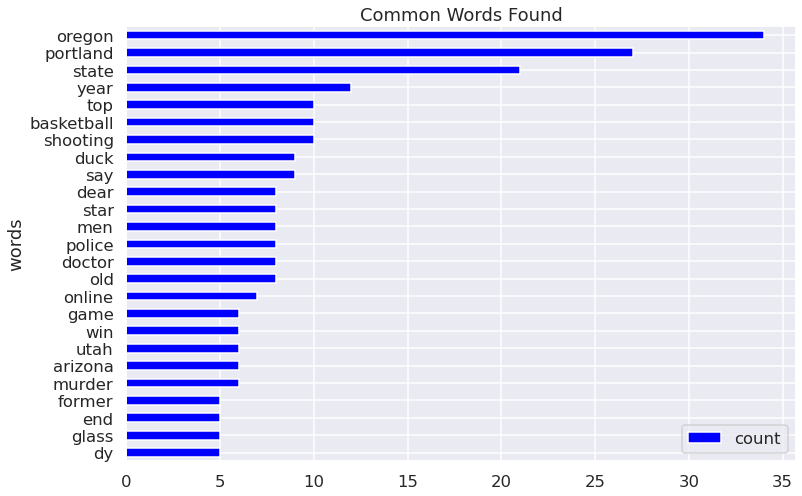

In [184]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")
ax.set_title("Common Words Found")
plt.show()